<a href="https://colab.research.google.com/github/mflilian/PROJETOPokemon/blob/main/Projeto_Pok%C3%A9mon_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Pokémon 


**Parte 2** 



Objetivo: Analisar alguns atributos dos Pokémons através do uso de graficos, dados estatísticos e análise de correlações e relacionar com a primeira parte do projeto.

**Atenção**

Assim como no projeto anterior, resolvemos reduzir o número de pokémons que foram mostrados: foram selecionados 20 Pokémons aleatoriamente e sem criterio de escolha.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.read_csv("http://professor.ufabc.edu.br/~ronaldo.prati/bases/Pokemon_sim.csv") 
df = pd.read_csv("http://professor.ufabc.edu.br/~ronaldo.prati/bases/Pokemon_sim.csv")

df.sample(21)
df = df.sample(21)
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,vitorias,derrotas,empates,media_movimentos,partidas,% vitorias,% derrotas,% empates,rank
267,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False,4433.0,73144.0,23.0,3.768402,77600.0,5.712629,94.257732,0.029639,0.055221
116,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False,25725.0,51875.0,0.0,7.690322,77600.0,33.150773,66.849227,0.000000,0.327583
557,Solosis,Psychic,NaN,290,45,30,40,105,50,20,5,False,19899.0,57682.0,19.0,6.090077,77600.0,25.643041,74.332474,0.024485,0.252855
522,Sewaddle,Bug,Grass,310,45,53,70,40,60,42,5,False,17304.0,60296.0,0.0,7.799317,77600.0,22.298969,77.701031,0.000000,0.219524
18,Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False,8135.0,69465.0,0.0,4.506482,77600.0,10.483247,89.516753,0.000000,0.102289
668,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,71,6,False,61770.0,15830.0,0.0,7.486250,77600.0,79.600515,20.399485,0.000000,0.792629
207,Teddiursa,Normal,NaN,330,60,80,50,50,50,40,2,False,27772.0,49727.0,101.0,7.538995,77600.0,35.788660,64.081186,0.130155,0.354351
449,Tangrowth,Grass,NaN,535,100,100,125,110,50,50,4,False,51489.0,26110.0,1.0,11.747075,77600.0,66.351804,33.646907,0.001289,0.659575
194,Girafarig,Normal,Psychic,455,70,80,65,90,65,85,2,False,39799.0,37799.0,2.0,8.706430,77600.0,51.287371,48.710052,0.002577,0.508712
149,Totodile,Water,NaN,314,50,65,64,44,48,43,2,False,21837.0,55761.0,2.0,7.511134,77600.0,28.140464,71.856959,0.002577,0.277665


Já de inicio, estabelecemos que nossa tabela irá ser organizada de seguinte forma:

Primeiramente a análise será feita somente em Pokemons Não-Lendários e não inserimos a coluna "partidas" pois, todos os Pokémons apresenta o mesmo numero de combates.

In [ ]:
df = df.drop(columns='partidas')
df[(df['Legendary'] == False)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,vitorias,derrotas,empates,media_movimentos,% vitorias,% derrotas,% empates,rank
267,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False,4433.0,73144.0,23.0,3.768402,5.712629,94.257732,0.029639,0.055221
116,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False,25725.0,51875.0,0.0,7.690322,33.150773,66.849227,0.000000,0.327583
557,Solosis,Psychic,NaN,290,45,30,40,105,50,20,5,False,19899.0,57682.0,19.0,6.090077,25.643041,74.332474,0.024485,0.252855
522,Sewaddle,Bug,Grass,310,45,53,70,40,60,42,5,False,17304.0,60296.0,0.0,7.799317,22.298969,77.701031,0.000000,0.219524
18,Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False,8135.0,69465.0,0.0,4.506482,10.483247,89.516753,0.000000,0.102289
668,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,71,6,False,61770.0,15830.0,0.0,7.486250,79.600515,20.399485,0.000000,0.792629
207,Teddiursa,Normal,NaN,330,60,80,50,50,50,40,2,False,27772.0,49727.0,101.0,7.538995,35.788660,64.081186,0.130155,0.354351
449,Tangrowth,Grass,NaN,535,100,100,125,110,50,50,4,False,51489.0,26110.0,1.0,11.747075,66.351804,33.646907,0.001289,0.659575
194,Girafarig,Normal,Psychic,455,70,80,65,90,65,85,2,False,39799.0,37799.0,2.0,8.706430,51.287371,48.710052,0.002577,0.508712
149,Totodile,Water,NaN,314,50,65,64,44,48,43,2,False,21837.0,55761.0,2.0,7.511134,28.140464,71.856959,0.002577,0.277665


Na célula a seguir, foi plotado o desvio padrão das seguintes colunas:

vitorias, derrotas, empates, media movimentos, porcentagem de vitorias, porcentagem de derrotas, assim como, porcentagem de empates e o rank

In [ ]:
df_std = df.drop(columns=['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary',])
df_std.std()

vitorias            19432.195716
derrotas            19395.950714
empates               226.063371
media_movimentos        3.399833
% vitorias             25.041489
% derrotas             24.994782
% empates               0.291319
rank                    0.250114
dtype: float64

Calculamos o valor da mediana de algumas colunas com o comando `median`:

In [ ]:
df_median = df_std.drop(columns=['Name','Type 1','Type 2','media_movimentos','% empates'])
df_median.median

<bound method DataFrame.median of      vitorias  derrotas  empates  % vitorias  % derrotas      rank
267    4433.0   73144.0     23.0    5.712629   94.257732  0.055221
116   25725.0   51875.0      0.0   33.150773   66.849227  0.327583
557   19899.0   57682.0     19.0   25.643041   74.332474  0.252855
522   17304.0   60296.0      0.0   22.298969   77.701031  0.219524
18     8135.0   69465.0      0.0   10.483247   89.516753  0.102289
668   61770.0   15830.0      0.0   79.600515   20.399485  0.792629
207   27772.0   49727.0    101.0   35.788660   64.081186  0.354351
449   51489.0   26110.0      1.0   66.351804   33.646907  0.659575
194   39799.0   37799.0      2.0   51.287371   48.710052  0.508712
149   21837.0   55761.0      2.0   28.140464   71.856959  0.277665
606   66912.0   10494.0    194.0   86.226804   13.523196  0.861553
462   38898.0   38702.0      0.0   50.126289   49.873711  0.497087
259   26380.0   51178.0     42.0   33.994845   65.951031  0.336181
190   55300.0   22300.0     

Nesta ocasição, plotamos um grafico das vitorias dos 20 Pokémons que selecionamos aleatoriamente no inicio desta análise. A partir desse grafico, iremos fazer alguns estudos nas próximas células.

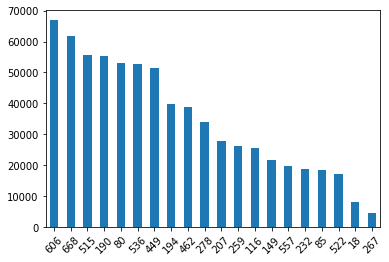

In [ ]:
 df[['vitorias']].sum(axis=1).sort_values(ascending=False).head(20).plot(kind='bar',rot=45)

Assim como anteriormente, plotamos um grafico para futuras análises, pórem, dessa vez, foi plotado um grafico com as derrotas de 20 Pokemons.

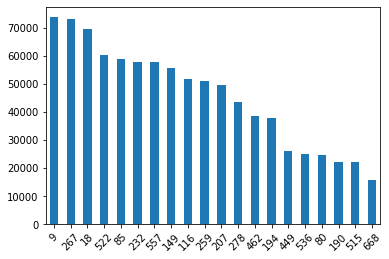

In [ ]:
df[['derrotas']].sum(axis=1).sort_values(ascending=False).head(20).plot(kind='bar',rot=45)

Gráfico onde mostra os numeros de empates nas partidas entre os mesmos pokémons a cima.

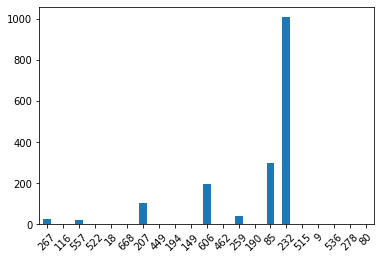

In [ ]:
df[['empates']].sum(axis=1).plot(kind='bar',rot=45)

Como foi referenciado primeiramente, a partir da célula subsequente iremos começar a análisar uma nova coluna. no comando a seguir, inserimos um filtro onde tem como condição ter o indice de vitorias superiores a 50000 ou a derrota igual ou maior a 60000. 

Partindo disso, o numero de Pokémons que se adequaram nessas novas regras foi de 40% de 20 Pokémons.

In [ ]:
df_filtro = df.query(" vitorias > 50000.0 or derrotas >= 60000.0 ")

In [ ]:
df_filtro.sort_values(by=["vitorias","derrotas"], ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,vitorias,derrotas,empates,media_movimentos,% vitorias,% derrotas,% empates,rank
606,Bouffalant,Normal,NaN,490,95,110,95,40,95,55,5,False,66912.0,10494.0,194.0,8.870387,86.226804,13.523196,0.250000,0.861553
57,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1,False,58888.0,18712.0,0.0,10.413840,75.886598,24.113402,0.000000,0.755284
148,Typhlosion,Fire,NaN,534,78,84,78,109,85,100,2,False,55984.0,21616.0,0.0,7.863724,72.144330,27.855670,0.000000,0.717691
642,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False,52605.0,24995.0,0.0,8.331675,67.789948,32.210052,0.000000,0.673990
22,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False,11418.0,66182.0,0.0,5.094510,14.713918,85.286082,0.000000,0.144194
493,Pansage,Grass,NaN,316,50,53,48,53,48,64,5,False,10482.0,67118.0,0.0,7.461740,13.507732,86.492268,0.000000,0.132237
193,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False,9670.0,66467.0,1463.0,33.111211,12.461340,85.653351,1.885309,0.124215
185,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False,9036.0,68559.0,5.0,6.679485,11.644330,88.349227,0.006443,0.113787
121,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,183.0,77417.0,0.0,3.508570,0.235825,99.764175,0.000000,0.001972


Antes de tudo, achamos que seria mais justo que ter apenas Pokémons Não-Lendários nessa tabela e, percebe-se que esse é o motivo principal de termos exclusivamente 40% total de Pokémos que tinhamos no inicio do projeto.

Sendo assim, foi possivel observar que o numero de derrotas foi inferiormente baixo naqueles que tinham uma taxa alta de vitorias, porém, foi possivel tambem observar que existiam uma minoria bem visivel de Pokémons que náo tiveram nenhuma partida empatada. 

Com tudo, tivemos a descoberta que, esse Pokémons, no qual não tiveram nenhum empate, estão mais equilibrados quando falamos de porcentagens de ganhar ou perder uma nova batalha, pelo seguinte motivo de não ter nenhuma partida no qual eles teriam empatados.

# **Gráficos de partidas**

Os três proximos gráficos exemplificam a explicação anterior,

No primeira gráfico, plotamos as vitorias do 40% dos Pokemons que se encaixaram dentro das regras. Onde foi possivel observar que alguns pokémons possui o dobro de vitorias que outros, mesmo estando dentro dos padrões impostos inicialmente.

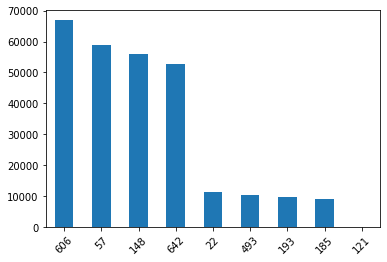

In [ ]:
df_filtro[['vitorias']].sum(axis=1).sort_values(ascending=False).plot(kind='bar',rot=45)

Nesse gráfico observamos que assim como os Pokémons que tiveram o maior numero de vitorias, nesse gráfico, que foi plotado as derrotas dos mesmos, sairam na vantagem, pois tiveram o resultado menor que os outros Pokémons em relação as suas vitorias.

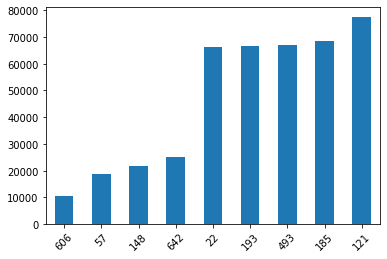

In [ ]:
df_filtro[['derrotas']].sum(axis=1).sort_values(ascending=True).plot(kind='bar',rot=45)

Gráfico de Pokémons que tiveram suas partidas empatadas.

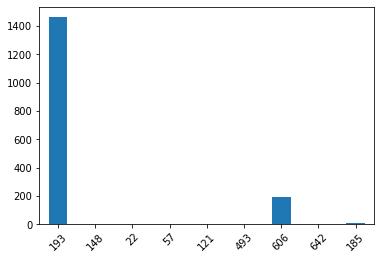

In [ ]:
df_filtro[['empates']].sum(axis=1).plot(kind='bar',rot=45)